<a href="https://colab.research.google.com/github/brobro10000/CS5262-foundations-of-machine-learning/blob/main/LinearRegressionHW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
# imports
import os
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.typing import NDArray




In [237]:
# prompt: mount gdrive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
base_path = '/content/drive/MyDrive/Colab Notebooks/hw8'
default_save_dir = 'models'
files = {
    'food_truck_data': os.path.join(base_path, 'food_truck_data.txt'),
    'housing_price_data': os.path.join(base_path, 'housing_price_data.txt')
}
file_locations = {}
for file_name, directory in files.items():
  file_locations[file_name] = directory

food_truck_data_base = pd.read_csv(file_locations['food_truck_data'], header=None)
housing_price_data_base = pd.read_csv(file_locations['housing_price_data'], header=None)

food_truck_data_base.columns = ['city_population', 'profit']
housing_price_data_base.columns = ['size', 'bedrooms', 'price']


## Cost function for Linear Regression

$$J(\theta) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

## Gradient Descent



In [239]:
# Convert columns to numpy arrays
X = food_truck_data_base["city_population"].values.reshape(-1, 1)
y = food_truck_data_base["profit"].values.reshape(-1, 1)

# Introduce bias and initialize theta
X_b = np.hstack([np.ones_like(X), X])
theta = np.zeros((2, 1))

def model_error(
    X_b: NDArray[np.float64],
    y: NDArray[np.float64],
    theta: NDArray[np.float64]
) -> NDArray[np.float64]:
    """
    Compute the hypothesis and residuals (errors) for a linear regression model.

    Args:
        X_b: Feature matrix with bias term.
        y: Target values.
        theta: Parameter vector.

    Returns:
            NDArray[np.float64]: Residuals (prediction errors), shape (m, 1).
    """
    # h_theta(X)
    predictions = X_b.dot(theta)
    # h_theta(X) - y
    errors = predictions - y
    return errors

def compute_cost_function(
    X_b: NDArray[np.float64],
    y: NDArray[np.float64],
    theta: NDArray[np.float64]
) -> float:
    """
    Compute the cost function for linear regression.
    https://en.wikipedia.org/wiki/Linear_regression

    Args:
        X_b (NDArray[np.float64]): Feature matrix with bias term, shape (m, n+1).
        y (NDArray[np.float64]): Target vector, shape (m, 1).
        theta (NDArray[np.float64]): Parameter vector, shape (n+1, 1).

    Returns:
        float: The computed cost (mean squared error divided by 2).
    """
    m = len(y)
    errors = model_error(X_b, y, theta)
    # Calculate final cost function
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def gradient_descent_history(
    X_b: NDArray[np.float64],
    y: NDArray[np.float64],
    theta: NDArray[np.float64],
    learning_rate: float,
    n_iterations: int,
    tolerance: float,
) -> tuple[NDArray[np.float64], list[float]]:
    """
    Perform gradient descent for linear regression with early stopping.

    Args:
        X_b: Feature matrix with bias term (m, n+1)
        y: Target values (m, 1)
        theta: Initial parameters (n+1, 1)
        learning_rate: Step size for updates
        n_iterations: Maximum number of iterations
        tolerance: Threshold for cost change to trigger early stopping

    Returns:
        theta: Optimized parameter vector (n+1, 1)
        cost_history: List of cost values per iteration
    """
    m = len(y)
    cost_history = []

    previous_cost = compute_cost_function(X_b, y, theta)
    # instantiate the history
    cost_history.append(previous_cost)

    for iteration in range(1, n_iterations + 1):
        # Compute predicted values and errors
        errors = model_error(X_b, y, theta)

        # Compute gradients and update parameters
        gradients = (1 / m) * X_b.T.dot(errors)
        theta = theta - learning_rate * gradients

        # calculate loss
        current_cost = compute_cost_function(X_b, y, theta)
        cost_history.append(current_cost)

        # calculate cost change for early stopping
        cost_change = abs(previous_cost - current_cost)
        if cost_change < tolerance:
            print(f"Early stopping at iteration {iteration}: Cost = {current_cost:.6f}, Change = {cost_change:.8f}")
            break

        previous_cost = current_cost

    return theta, cost_history


# Single Variable
## Model Description

In this linear regression model, we aim to predict the **profit** of a food truck based on the **population** of a city. The input parameter `X` represents the population values for each city (a single feature), and the output `y` represents the corresponding profit. To allow the model to learn both an intercept and a slope, we augment the feature matrix with a bias term, resulting in an input matrix `X_b` of shape `((m, 2))`, where `(m)` is the number of training examples.

The hypothesis function is defined as:

$$
h_\theta(x) = \theta_0 + \theta_1 \cdot x
$$

Where:
- $ (x) $ is the city population  
- $ (h_\theta(x)) $ is the predicted profit  
- $ \theta_0 $ is the bias (intercept)  
- $ \theta_1 $ is the weight (slope)

We initialize the parameter vector $ (\theta) $ to zeros and optimize it using **gradient descent**. The cost function used is the mean squared error (MSE), defined as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2
$$


The model updates $ (\theta) $ iteratively using the gradient of the cost function.

The training process includes **early stopping**: if the change in cost between two consecutive iterations falls below a defined `tolerance`, the algorithm stops to prevent overfitting and unnecessary computation.

To monitor training progress, we plot the **cost function over time**, where the x-axis represents the iteration number and the y-axis represents the cost value. This helps visualize how the model is minimizing error as it learns.

After training, we visualize the **line of best fit** by plotting the original data points (population vs. profit) as a scatter plot and overlaying the learned linear model $ ( h_\theta(x) ) $ as a red line. This shows how well the model fits the training data and provides a clear, interpretable representation of the relationship between city population and profit.


In [240]:
# Single Variable Case
# Convert columns to numpy arrays
X = food_truck_data_base["city_population"].values.reshape(-1, 1)
y = food_truck_data_base["profit"].values.reshape(-1, 1)

# Introduce bias and initialize theta
X_b = np.hstack([np.ones_like(X), X])
theta = np.zeros((2, 1))

theta_final, cost_history = gradient_descent_history(
    X_b, y,
    theta, learning_rate=0.001,
    n_iterations=2000,
    tolerance=1e-3
)
print("Final theta values:\n", theta_final)

Early stopping at iteration 54: Cost = 5.890551, Change = 0.00097177
Final theta values:
 [[0.04044216]
 [0.78980299]]


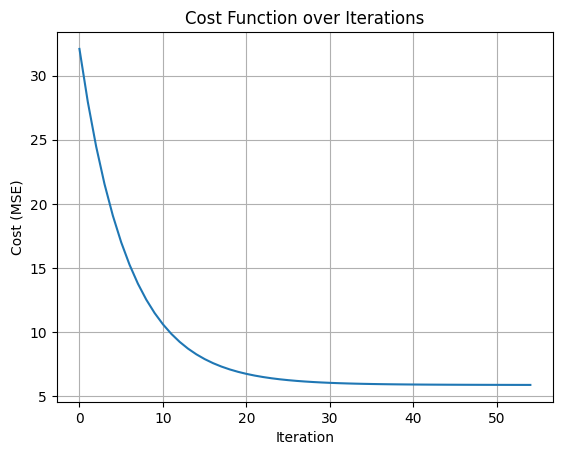

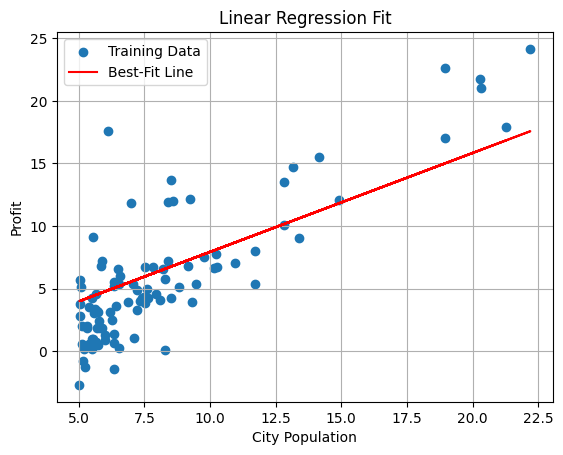

In [241]:
# Plot the gradient descent and line of best fit
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()

# Make predictions using the learned theta
predictions = X_b.dot(theta_final)

# Plot original data
plt.scatter(X, y, label="Training Data")

# Plot regression line
plt.plot(X, predictions, color="red", label="Best-Fit Line")

plt.xlabel("City Population")
plt.ylabel("Profit")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

## 📘 Multivariable Model Description

In this linear regression model, we aim to predict the **price** of a house based on two input features: **size (in square feet)** and **number of bedrooms**. The input matrix `X` consists of these two features for each training example. To allow the model to learn both feature weights and an intercept, we scale the features using min-max normalization and then augment the feature matrix with a bias term, resulting in `X_b` of shape `((m, 3))`, where `(m)` is the number of training examples and 3 corresponds to `([1, size, bedrooms])`.

The hypothesis function in the multivariable case becomes:

$$
h_\theta(x) = \theta_0 + \theta_1 \cdot \text{size} + \theta_2 \cdot \text{bedrooms}
$$

Where:
- $ (x) $ is the vector of features `([size,bedrooms])`  
- $ (h_\theta(x)) $ is the predicted house price  
- $ (\theta_0) $ is the intercept term (bias)  
- $ (\theta_1, \theta_2) $ are the learned weights for each feature

We initialize the parameter vector $ (\theta) $ to zeros and optimize it using **gradient descent**. The cost function remains the mean squared error (MSE), defined as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2
$$

The gradient descent update rule is similarly extended to multiple variables.

We monitor training progress by plotting the **cost function over time**, with iterations on the x-axis and cost (MSE) on the y-axis. This visualizes how quickly and effectively the model minimizes error over time.

After training, we visualize the **plane of best fit** in 3D. We plot the original data points (size, bedrooms, price) as red scatter points, and overlay the regression plane produced by the learned model. The plane helps interpret how the two features combine to influence the predicted price, offering an intuitive visual explanation of the multivariable relationship.


In [242]:
# Multi Variable Case
# Convert columns to numpy arrays for second dataset
X = housing_price_data_base[["size", "bedrooms"]].values
y = housing_price_data_base["price"].values.reshape(-1, 1)

X_min = X.min(axis=0)
X_max = X.max(axis=0)

# introduce feature scaling with min max scaler
X_scaled = (X - X_min) / (X_max - X_min)

# Add bias
X_b = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize theta
theta = np.zeros((X_b.shape[1], 1))

theta_final, cost_history = gradient_descent_history(
    X_b,
    y,
    theta,
    learning_rate=0.001,
    n_iterations=2500,
    tolerance=1e-3,
)

print("Final theta values:\n", theta_final)

Final theta values:
 [[225544.9518395 ]
 [113985.71114205]
 [134813.37078268]]


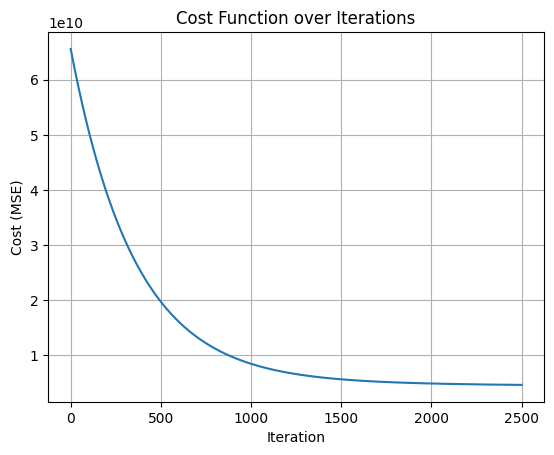

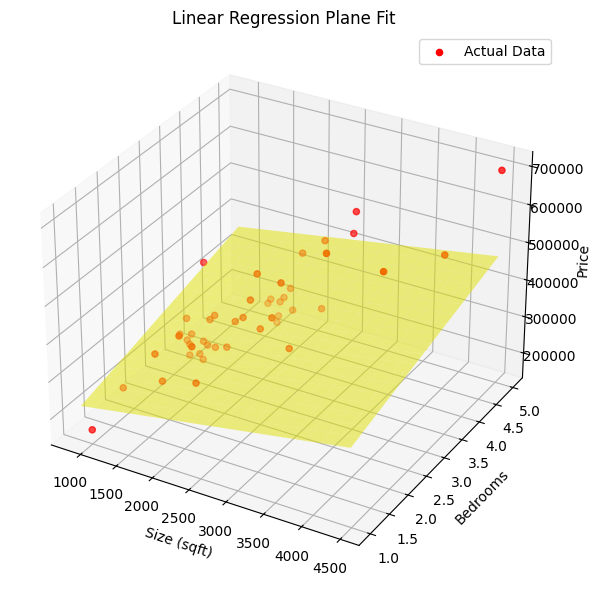

In [243]:
# plot plane of best fit and gradient descent
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()


# Unscale X for visualization
X_unscaled = X
y_flat = y.flatten()

# Prepare a grid over the input space
size_range = np.linspace(X_unscaled[:, 0].min(), X_unscaled[:, 0].max(), 20)
bedroom_range = np.linspace(X_unscaled[:, 1].min(), X_unscaled[:, 1].max(), 20)
size_grid, bedroom_grid = np.meshgrid(size_range, bedroom_range)

# Flatten and scale the grid points for prediction
grid_points = np.c_[size_grid.ravel(), bedroom_grid.ravel()]
grid_points_scaled = (grid_points - X_min) / (X_max - X_min)
grid_points_scaled_b = np.hstack([np.ones((grid_points_scaled.shape[0], 1)), grid_points_scaled])

# Predict using the model
predicted_prices = grid_points_scaled_b.dot(theta_final).reshape(size_grid.shape)

# 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot actual data points
ax.scatter(X_unscaled[:, 0], X_unscaled[:, 1], y_flat, color="red", label="Actual Data")

# Plot regression plane
ax.plot_surface(size_grid, bedroom_grid, predicted_prices, alpha=0.5, color="yellow")

ax.set_xlabel("Size (sqft)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Linear Regression Plane Fit")

plt.legend()
plt.tight_layout()
plt.show()
